In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
data = pd.read_csv('mushrooms.csv')

In [68]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [69]:
data.shape

(8124, 23)

In [70]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [71]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [73]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [74]:
data.loc[data['stalk-root']=='?']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [75]:
data=data.replace(to_replace="?",value=data['stalk-root'].mode()[0])

In [76]:
data1['stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

In [77]:
data1.loc[3984]

class                       e
cap-shape                   x
cap-surface                 y
cap-color                   b
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  e
stalk-shape                 e
stalk-root                  b
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      e
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 t
ring-type                   e
spore-print-color           w
population                  c
habitat                     w
Name: 3984, dtype: object

# label encoding all features

In [78]:
mappings=list()

labelencoder=LabelEncoder()
for column in data.columns:
    data[column]=labelencoder.fit_transform(data[column])
    mappings_dict={index:label for index, label in enumerate(labelencoder.classes_)}
    mappings.append(mappings_dict)

In [79]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y'},
 {0:

In [206]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [207]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

# Checking Correlation

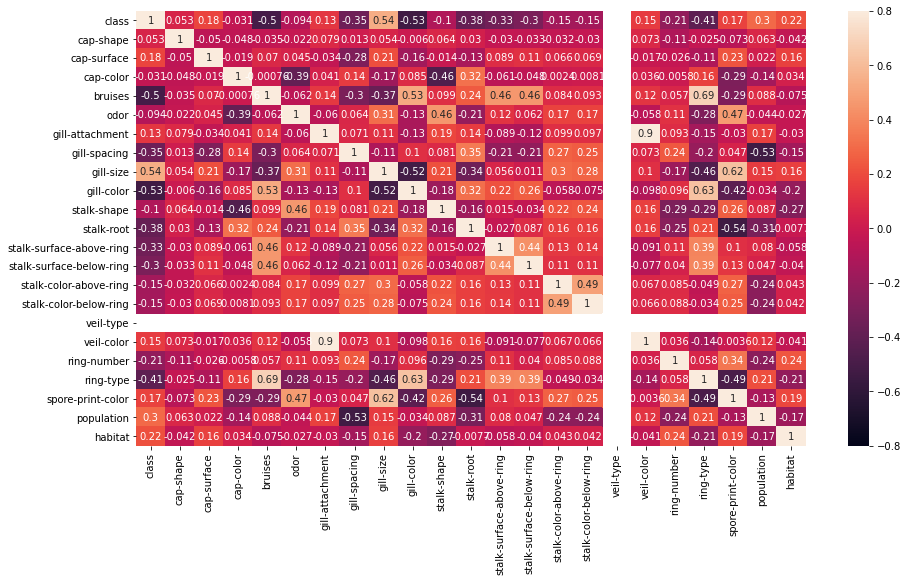

In [208]:
corrmetrix = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrmetrix,vmin=-.8,vmax=.8,annot=True)
plt.show()

removing some of multicorrelated variables

In [12]:
data=data.drop(["spore-print-color","gill-color","veil-type","gill-attachment","ring-type","population","cap-color"],axis=1)

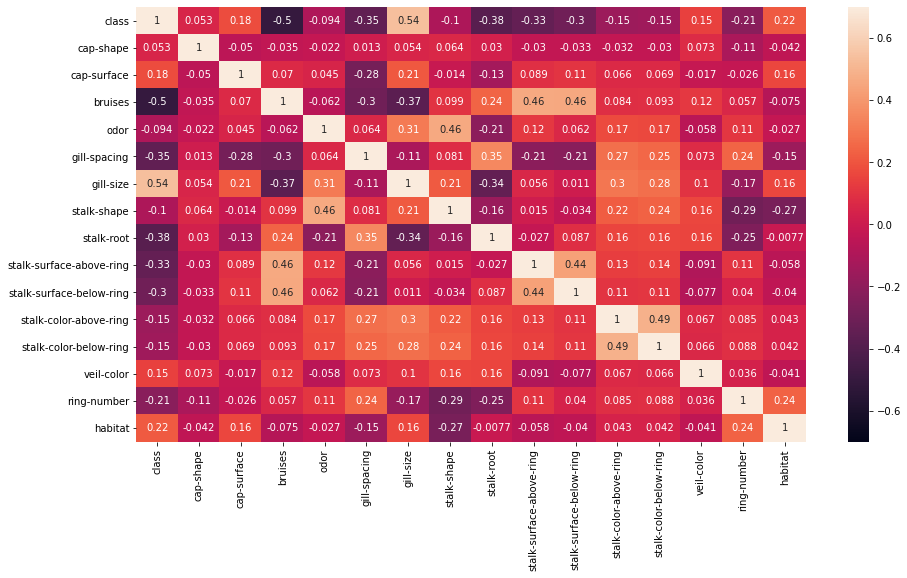

In [13]:
corrmetrix = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrmetrix,vmin=-.7,vmax=.7,annot=True)
plt.show()

# data splitting

In [176]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)

In [178]:
x_train.shape

(6093, 15)

# Gussian Naive Bayes Classifier

In [17]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [18]:
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[899, 170],
       [ 77, 885]], dtype=int64)

In [19]:
accuracy_score(y_test,y_pred)

0.8783850320039389

# Bernoulli Naive Bayes Classifier

In [20]:
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[1011,   58],
       [ 166,  796]], dtype=int64)

In [21]:
accuracy_score(y_test,y_pred)

0.8897095027080256

# **logistic regression**

In [22]:
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))

Confusion_matrix is :
 [[1021   48]
 [  68  894]]


C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print('Classification report :\n' ,classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1069
           1       0.95      0.93      0.94       962

    accuracy                           0.94      2031
   macro avg       0.94      0.94      0.94      2031
weighted avg       0.94      0.94      0.94      2031



 **svm**

**linear svm**

In [24]:
classifier = SVC(kernel="linear",random_state=123)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

 **Confusion metrics and Classification report**

In [25]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Confusion_matrix is :
 [[1043   26]
 [  85  877]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1069
           1       0.97      0.91      0.94       962

    accuracy                           0.95      2031
   macro avg       0.95      0.94      0.94      2031
weighted avg       0.95      0.95      0.95      2031



**radial svm**

In [26]:
svm_ra=SVC(kernel='rbf',random_state=13)
svm_ra.fit(x_train,y_train),
y_pred=svm_ra.predict(x_test)

In [27]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Confusion_matrix is :
 [[1055   14]
 [  36  926]]
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1069
           1       0.99      0.96      0.97       962

    accuracy                           0.98      2031
   macro avg       0.98      0.97      0.98      2031
weighted avg       0.98      0.98      0.98      2031



**knn** 

In [28]:
acc_values = []
neighbors = np.arange(1,16)
for i in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  acc_values.append(acc)

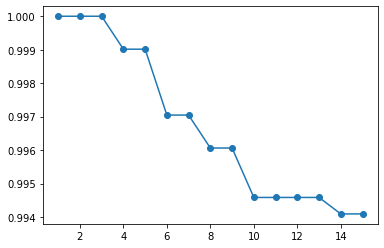

In [29]:
plt.plot(range(1,16),acc_values,'-o')
plt.show()

In [30]:
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

**Confusion Metrics Accuracy score and classification report**

In [31]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Accuracy is : 1.0
Confusion_matrix is :
 [[1069    0]
 [   0  962]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



**decision tree**

In [32]:
clf = DecisionTreeClassifier(random_state=123)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Accuracy is : 1.0
Confusion_matrix is :
 [[1069    0]
 [   0  962]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



**parameter tuning**

In [33]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=123,min_samples_split=5,max_depth=5)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Accuracy is : 0.9921221073362876
Confusion_matrix is :
 [[1057   12]
 [   4  958]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1069
           1       0.99      1.00      0.99       962

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



**Random forest Classifier**

In [34]:
rf=RandomForestClassifier(random_state=123)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Accuracy is 1.0
Confusion_matrix is :
 [[1069    0]
 [   0  962]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [62]:
rf=RandomForestClassifier(n_estimators=25,criterion="entropy",random_state=123)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Accuracy is 1.0
Confusion_matrix is :
 [[1069    0]
 [   0  962]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [63]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
rfe=RFE(estimator=RandomForestClassifier(),n_features_to_select=5)
rfe.fit(x_train,y_train)
for i in range(x.shape[1]):
    print('column:%d,selected %s,Rank:%.3f'%(i,rfe.support_[i],rfe.ranking_[i]))

column:0,selected False,Rank:10.000
column:1,selected False,Rank:8.000
column:2,selected False,Rank:2.000
column:3,selected True,Rank:1.000
column:4,selected False,Rank:3.000
column:5,selected True,Rank:1.000
column:6,selected False,Rank:5.000
column:7,selected True,Rank:1.000
column:8,selected True,Rank:1.000
column:9,selected True,Rank:1.000
column:10,selected False,Rank:7.000
column:11,selected False,Rank:6.000
column:12,selected False,Rank:11.000
column:13,selected False,Rank:9.000
column:14,selected False,Rank:4.000


In [64]:
from sklearn.feature_selection import SelectFromModel
sel=SelectFromModel(RandomForestClassifier(n_estimators=25,random_state=123,n_jobs=-1))
sel.fit(x_train,y_train)
sel.get_support()

array([False, False,  True,  True, False,  True, False,  True,  True,
       False, False, False, False, False, False])

In [65]:
x_train.columns

Index(['cap-shape', 'cap-surface', 'bruises', 'odor', 'gill-spacing',
       'gill-size', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'habitat'],
      dtype='object')

In [66]:
len(sel.get_support())

15

In [67]:
features=x_train.columns[sel.get_support()]
features

Index(['bruises', 'odor', 'gill-size', 'stalk-root',
       'stalk-surface-above-ring'],
      dtype='object')

In [68]:
np.mean(sel.estimator_.feature_importances_)

0.06666666666666668

In [69]:
sel.estimator_.feature_importances_

array([0.01315725, 0.0234263 , 0.0719729 , 0.25526924, 0.0500082 ,
       0.1583083 , 0.05220913, 0.10302337, 0.09627718, 0.06298147,
       0.02020187, 0.01313894, 0.01113999, 0.03090039, 0.03798548])

In [70]:
x_train_rfc=sel.transform(x_train)
x_test_rfc=sel.transform(x_test)

In [71]:
def run_randomForest(x_train,x_test,y_train,y_test):
    clf=RandomForestClassifier(n_estimators=25,random_state=123,n_jobs=-1)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print('Accuracy:',accuracy_score(y_test,y_pred))

In [72]:
%%time
run_randomForest(x_train_rfc,x_test_rfc,y_train,y_test)

Accuracy: 0.9891678975873953
Wall time: 124 ms


In [73]:
%%time
run_randomForest(x_train,x_test,y_train,y_test)

Accuracy: 1.0
Wall time: 128 ms


# Recursive Feature Elimination(RFE)

In [74]:
from sklearn.feature_selection import RFE
sel=RFE(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),n_features_to_select=5)
sel.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=5)

In [75]:
sel.get_support()

array([False, False, False,  True, False,  True, False,  True,  True,
        True, False, False, False, False, False])

In [76]:
features=x_train.columns[sel.get_support()]
features

Index(['odor', 'gill-size', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring'],
      dtype='object')

In [77]:
x_train_rfe=sel.transform(x_train)
x_test_rfe=sel.transform(x_test)

In [78]:
%%time
run_randomForest(x_train_rfe,x_test_rfe,y_train,y_test)

Accuracy: 0.9871984244214672
Wall time: 128 ms


In [79]:
%%time
run_randomForest(x_train,x_test,y_train,y_test)

Accuracy: 1.0
Wall time: 137 ms


In [80]:
for index in range(1,16):
    sel=RFE(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),n_features_to_select=index)
    sel.fit(x_train,y_train)
    x_train_rfe=sel.transform(x_train)
    x_test_rfe=sel.transform(x_test)
    print('Selected Feature:',index)
    run_randomForest(x_train_rfe,x_test_rfe,y_train,y_test)

Selected Feature: 1
Accuracy: 0.9807976366322009
Selected Feature: 2
Accuracy: 0.9807976366322009
Selected Feature: 3
Accuracy: 0.9871984244214672
Selected Feature: 4
Accuracy: 0.9871984244214672
Selected Feature: 5
Accuracy: 0.9871984244214672
Selected Feature: 6
Accuracy: 0.9891678975873953
Selected Feature: 7
Accuracy: 0.9891678975873953
Selected Feature: 8
Accuracy: 1.0
Selected Feature: 9
Accuracy: 1.0
Selected Feature: 10
Accuracy: 1.0
Selected Feature: 11
Accuracy: 1.0
Selected Feature: 12
Accuracy: 1.0
Selected Feature: 13
Accuracy: 1.0
Selected Feature: 14
Accuracy: 1.0
Selected Feature: 15
Accuracy: 1.0


In [81]:
for index in range(1,16):
    sel=RFE(GradientBoostingClassifier(n_estimators=100,random_state=123),n_features_to_select=index)
    sel.fit(x_train,y_train)
    x_train_rfe=sel.transform(x_train)
    x_test_rfe=sel.transform(x_test)
    print('Selected Feature:',index)
    run_randomForest(x_train_rfe,x_test_rfe,y_train,y_test)

Selected Feature: 1
Accuracy: 0.9807976366322009
Selected Feature: 2
Accuracy: 0.9807976366322009
Selected Feature: 3
Accuracy: 0.9817823732151649
Selected Feature: 4
Accuracy: 0.9871984244214672
Selected Feature: 5
Accuracy: 0.9940915805022157
Selected Feature: 6
Accuracy: 0.9950763170851797
Selected Feature: 7
Accuracy: 0.9960610536681438
Selected Feature: 8
Accuracy: 1.0
Selected Feature: 9
Accuracy: 1.0
Selected Feature: 10
Accuracy: 1.0
Selected Feature: 11
Accuracy: 1.0
Selected Feature: 12
Accuracy: 1.0
Selected Feature: 13
Accuracy: 1.0
Selected Feature: 14
Accuracy: 1.0
Selected Feature: 15
Accuracy: 1.0


In [182]:
sel=RFE(GradientBoostingClassifier(n_estimators=100,random_state=123),n_features_to_select=8)
sel.fit(x_train,y_train)
x_train_rfe=sel.transform(x_train)
x_test_rfe=sel.transform(x_test)
print('Selected Feature:',8)
run_randomForest(x_train_rfe,x_test_rfe,y_train,y_test)

Selected Feature: 8
Accuracy: 1.0


In [183]:
sel.get_support()

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True,  True])

In [184]:
features=x_train.columns[sel.get_support()]
features

Index(['cap-surface', 'odor', 'gill-size', 'stalk-root',
       'stalk-surface-below-ring', 'stalk-color-below-ring', 'ring-number',
       'habitat'],
      dtype='object')

**Gradient Boosting**

In [85]:
classifier = GradientBoostingClassifier(random_state=123)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Accuracy is 0.999507631708518
Confusion_matrix is :
 [[1069    0]
 [   1  961]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



**Xg Boost**

In [86]:
xgbc = XGBClassifier(random_state=123)
xgbc.fit(x_train,y_train)
y_pred = xgbc.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

[21:39:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vinay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy is 1.0
Confusion_matrix is :
 [[1069    0]
 [   0  962]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [ ]:
'cap-surface', 'odor', 'gill-size', 'stalk-root',
       'stalk-surface-below-ring', 'stalk-color-below-ring', 'ring-number',
       'habitat'
'cap-surface', 'odor', 'gill-size', 'stalk-root',
       'stalk-surface-below-ring', 'ring-number'
'odor', 'gill-size', 'stalk-root', 'stalk-surface-below-ring',
       'ring-number'
'cap-surface', 'odor', 'gill-size', 'stalk-root',
       'stalk-surface-below-ring', 'ring-number'

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   bruises                   8124 non-null   int32
 4   odor                      8124 non-null   int32
 5   gill-spacing              8124 non-null   int32
 6   gill-size                 8124 non-null   int32
 7   stalk-shape               8124 non-null   int32
 8   stalk-root                8124 non-null   int32
 9   stalk-surface-above-ring  8124 non-null   int32
 10  stalk-surface-below-ring  8124 non-null   int32
 11  stalk-color-above-ring    8124 non-null   int32
 12  stalk-color-below-ring    8124 non-null   int32
 13  veil-color                8124 non-null   int32
 14  ring-number               8124 non-null 

In [193]:
x=data.iloc[:,[4,6,8,10,14]]

In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)

In [195]:
x_train.shape

(6093, 5)

In [196]:
rf=RandomForestClassifier(n_estimators=25,criterion="entropy",random_state=123)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Accuracy is 0.9940915805022157
Confusion_matrix is :
 [[1061    8]
 [   4  958]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1069
           1       0.99      1.00      0.99       962

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [197]:
classifier = GradientBoostingClassifier(n_estimators=100,random_state=123)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Accuracy is 0.9940915805022157
Confusion_matrix is :
 [[1061    8]
 [   4  958]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1069
           1       0.99      1.00      0.99       962

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

